In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud

# Machine Learning and Feature Selection Libraries
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Statistical Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Evaluation Libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score

# Hyperparameter Optimization Library
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [68]:
data_for_train = pd.read_csv(r'D:\Machine Learning Project\Telco Customer Churn\Telco Customer Churn\Telco Customer Churn\train.csv')
data_for_test = pd.read_csv(r'D:\Machine Learning Project\Telco Customer Churn\Telco Customer Churn\Telco Customer Churn\test.csv')

In [69]:
data = data_for_train[['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Customer ID', 'Customer Status',
       'Device Protection Plan', 'Gender', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Payment Method', 'Population',
       'Premium Tech Support', 'Quarter',
       'Satisfaction Score', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Unlimited Data',
       'Zip Code', 'Churn']] 

In [70]:
data_test = data_for_test[['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Customer ID', 'Customer Status',
       'Device Protection Plan', 'Gender', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Payment Method', 'Population',
       'Premium Tech Support', 'Quarter',
       'Satisfaction Score', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Unlimited Data',
       'Zip Code', 'Churn']]

In [71]:
data_num = data.select_dtypes(include=['number'])
desc = pd.DataFrame()
desc['Null'] = data_num.isna().sum()
desc['Sample'] = data_num.count()
desc['Nunique'] = data_num.nunique()
desc['Unique'] = data_num.nunique() / data_num.shape[0] * 100
desc = desc.join(data_num.describe().T.drop(columns='count'))
desc

,Null,Sample,Nunique,Unique,mean,std,min,25%,50%,75%,max
Age,0,4225,62,1.467456,46.451124,16.731518,19.000000,32.000000,46.000000,60.000000,80.000000
Avg Monthly GB Download,0,4225,50,1.183432,20.740828,20.366105,0.000000,4.000000,17.000000,27.000000,85.000000
Avg Monthly Long Distance Charges,0,4225,2666,63.100592,22.766963,15.429992,0.000000,9.050000,22.570000,36.170000,49.990000
Churn Score,0,4225,81,1.917160,58.281183,21.197931,5.000000,40.000000,61.000000,75.000000,96.000000
CLTV,0,4225,2671,63.218935,4409.751243,1170.599119,2003.000000,3493.000000,4531.000000,5381.000000,6500.000000
Device Protection Plan,0,4225,2,0.047337,0.346982,0.476066,0.000000,0.000000,0.000000,1.000000,1.000000
Latitude,0,4225,1594,37.727811,36.207274,2.471090,32.555828,33.994524,36.205465,38.196497,41.962127
Longitude,0,4225,1593,37.704142,-119.768187,2.154078,-124.301372,-121.788090,-119.622676,-117.991372,-114.192901
Monthly Charge,0,4225,1387,32.828402,64.906462,29.926014,18.250000,38.550000,70.200000,89.750000,118.750000
Multiple Lines,0,4225,2,0.047337,0.416095,0.492968,0.000000,0.000000,0.000000,1.000000,1.000000


In [72]:
data.shape

(4225, 43)

In [73]:
missing_values = round(data.isnull().sum() / len(data) *100, 2)
print(missing_values[missing_values > 0])

Churn Category    73.47
Churn Reason      73.47
Internet Type     20.97
Offer             55.01
dtype: float64


([<matplotlib.patches.Wedge at 0x21ca99f59d0>,
 [Text(-0.7394815925531291, 0.8143506457755701, 'No Churn'),
  Text(0.7394816687981358, -0.8143505765403033, 'Churn')],
 [Text(-0.40335359593807035, 0.4441912613321291, '73.5%'),
  Text(0.40335363752625586, -0.4441912235674381, '26.5%')])

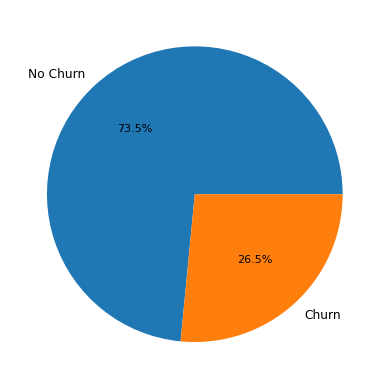

In [74]:
data_churn_counts = data['Churn'].value_counts()
plt.pie(data_churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%')

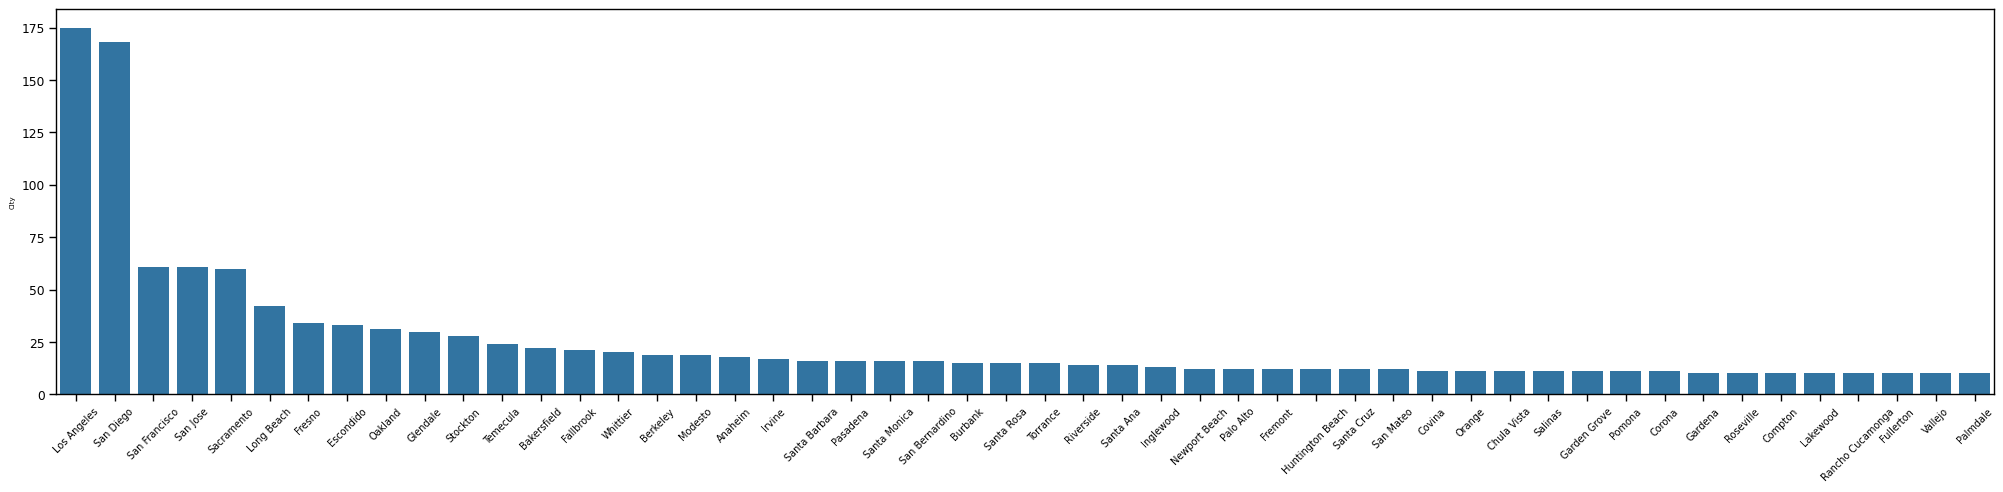

In [75]:
data_city_counts = data['City'].value_counts()
data_nlargest_city_counts = data_city_counts.nlargest(50)
plt.figure(figsize=(25,5))
sns.barplot(data_nlargest_city_counts)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5}) 
plt.xticks(rotation=45, fontsize=7)
plt.show()

<Axes: xlabel='Payment Method'>

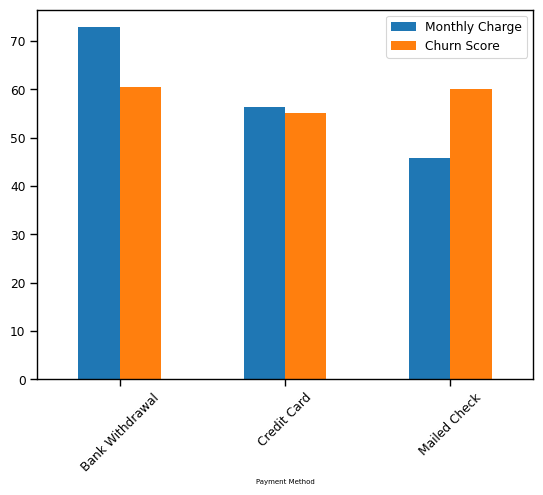

In [76]:
data.groupby('Payment Method').agg({"Monthly Charge":"mean", "Churn Score":"mean" }).plot(kind='bar', rot=45)

### Analysis of Monthly Charges and Churn Scores by Payment Method

The bar chart above compares the average monthly charge and churn score across different payment methods: Bank Withdrawal, Credit Card, and Mailed Check.

1. **Bank Withdrawal:**
   - **Monthly Charge:** Approximately 72 (the highest).
   - **Churn Score:** Around 60.

2. **Credit Card:**
   - **Monthly Charge:** Approximately 56.
   - **Churn Score:** Around 55.

3. **Mailed Check:**
   - **Monthly Charge:** Approximately 45 (the lowest).
   - **Churn Score:** Around 60.

**Interpretation:**

- **Bank Withdrawal:** Customers who pay through bank withdrawal have the highest monthly charges and pretty high churn scores. This might mean that higher charges are causing more people to leave (stop using the service).

- **Credit Card:** Customers who pay with credit cards have moderate monthly charges and churn scores. This means they have medium costs and are somewhat likely to leave (stop using the service).

- **Mailed Check:** Customers who pay by mailed check have the lowest monthly charges but still have high churn scores. This could mean that other reasons, apart from costs, might be making them leave (stop using the service).

**Conclusion:**

This visualization shows a possible connection between payment methods, monthly charges, and churn scores. Customers using Bank Withdrawal and Credit Cards tend to have higher charges and are more likely to leave, whereas customers paying by Mailed Checks have lower charges but are still likely to leave. This suggests that other factors besides cost might be influencing churn.


In [77]:
print(data[['Longitude', 'Latitude']].describe())

         Longitude     Latitude
count  4225.000000  4225.000000
mean   -119.768187    36.207274
std       2.154078     2.471090
min    -124.301372    32.555828
25%    -121.788090    33.994524
50%    -119.622676    36.205465
75%    -117.991372    38.196497
max    -114.192901    41.962127


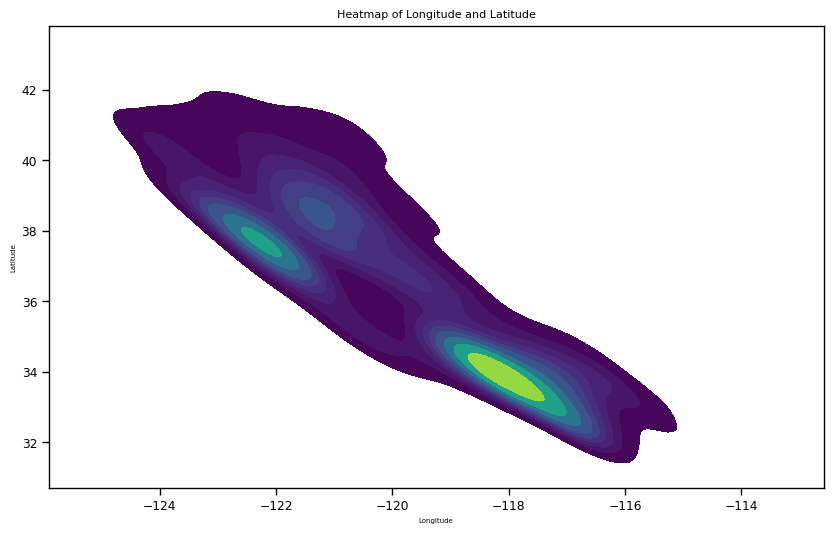

In [78]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Longitude', y='Latitude', data=data, cmap='viridis', fill=True)
plt.title('Heatmap of Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Explanation of the Heatmap

#### Axes and Labels:
1. X-Axis (Longitude): The x-axis represents the longitude values, ranging approximately from -125 to -114.
2. Y-Axis (Latitude): The y-axis represents the latitude values, ranging approximately from 32 to 42.

#### Color Intensity:
1. The color intensity represents the density of data points at different geographical locations.
2. Darker Colors (e.g., dark blue, purple): Indicate areas with lower densities of data points.
3. Lighter Colors (e.g., green, yellow): Indicate areas with higher densities of data points.

#### Density Peaks:
1. There are a few noticeable peaks with higher density, where the color shifts from dark blue to green and yellow.
2. These peaks indicate areas where there is a significant concentration of data points.

##### Clustered Areas:
1. There are clear clusters of higher density, particularly around longitudes -123 and -118 and latitudes 38 and 33, respectively. These clusters could correspond to major cities or populated areas where the data points (possibly customer locations, in the context of telco churn data) are concentrated.

In [79]:
#Churn
data_churn = data[data['Churn'] == 1]

<Axes: xlabel='Age'>

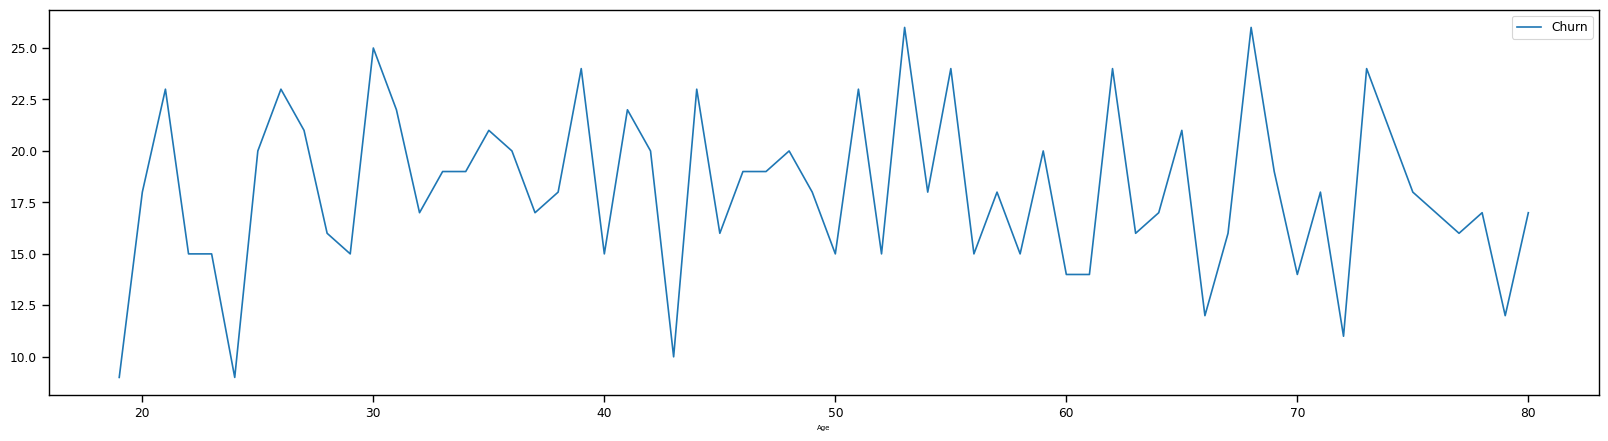

In [80]:
data_churn.groupby('Age').agg({'Churn': 'count'}).plot(figsize=(20,5))

<Axes: xlabel='Age'>

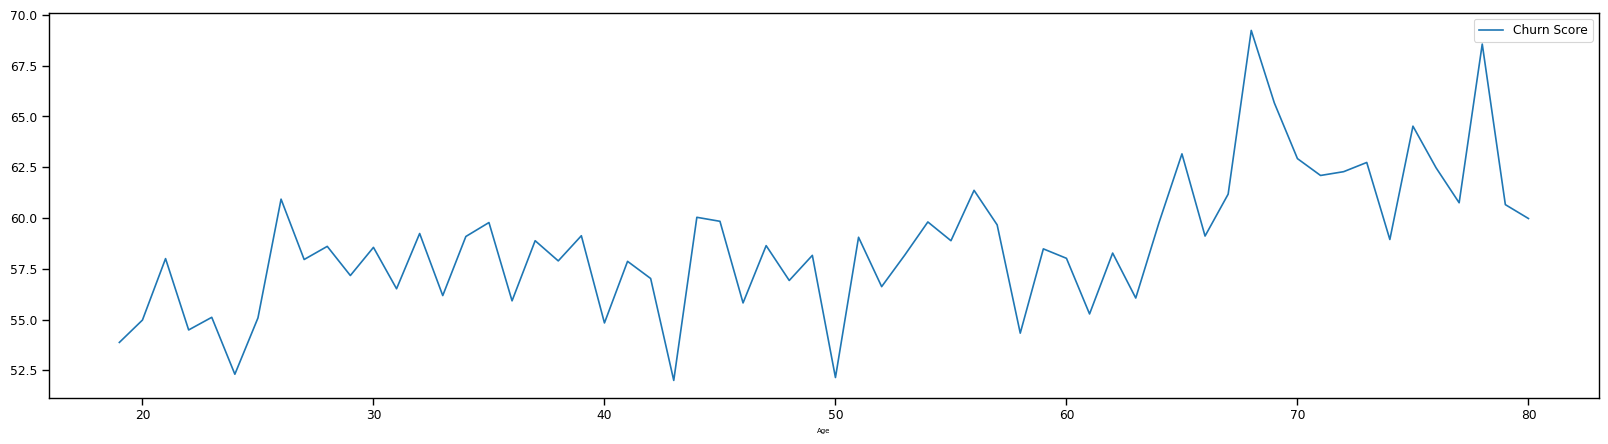

In [81]:
data.groupby('Age').agg({'Churn Score' : 'mean'}).plot(figsize=(20,5))

<Axes: ylabel='Churn'>

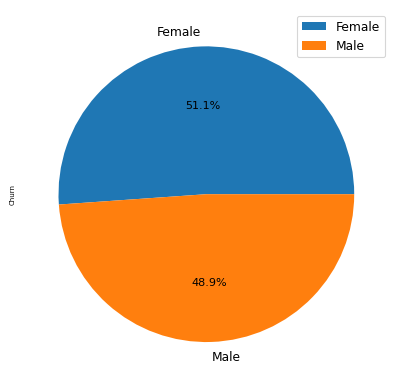

In [82]:
data_churn.groupby('Gender').agg({'Churn': 'count'}).plot(kind='pie', y='Churn', autopct='%1.1f%%')

In [83]:
def bin_age(data_bin):
    if data_bin <= 25:
        return '25 or younger'
    elif data_bin <= 40:
        return '26 to 40'
    else:
        return '41 or older'

data_churn['Age bins'] = data_churn['Age'].apply(bin_age)
data_churn.pivot_table(values='Churn', index='Churn Reason', columns='Age bins', aggfunc='count', margins=True) \
.dropna().astype(int).sort_values(by=('All'))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15996\3129167969.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_churn['Age bins'] = data_churn['Age'].apply(bin_age)


Age bins,25 or younger,26 to 40,41 or older,All
Churn Reason,,,,
Deceased,1,2,3,6
Poor expertise of online support,3,5,6,14
Lack of self-service on Website,2,7,8,17
Limited range of services,4,3,18,25
Extra data charges,1,7,19,27
Service dissatisfaction,4,6,22,32
Moved,1,7,24,32
Long distance charges,5,10,24,39
Product dissatisfaction,4,12,26,42


In [84]:
data_churn.pivot_table(values='Churn', index='Churn Category', columns='Age bins', aggfunc='count', margins=True) \
.dropna().astype(int).sort_values(by=('All'))

Age bins,25 or younger,26 to 40,41 or older,All
Churn Category,,,,
Price,10,30,90,130
Other,16,40,78,134
Dissatisfaction,23,40,108,171
Attitude,10,54,136,200
Competitor,50,128,308,486
All,109,292,720,1121


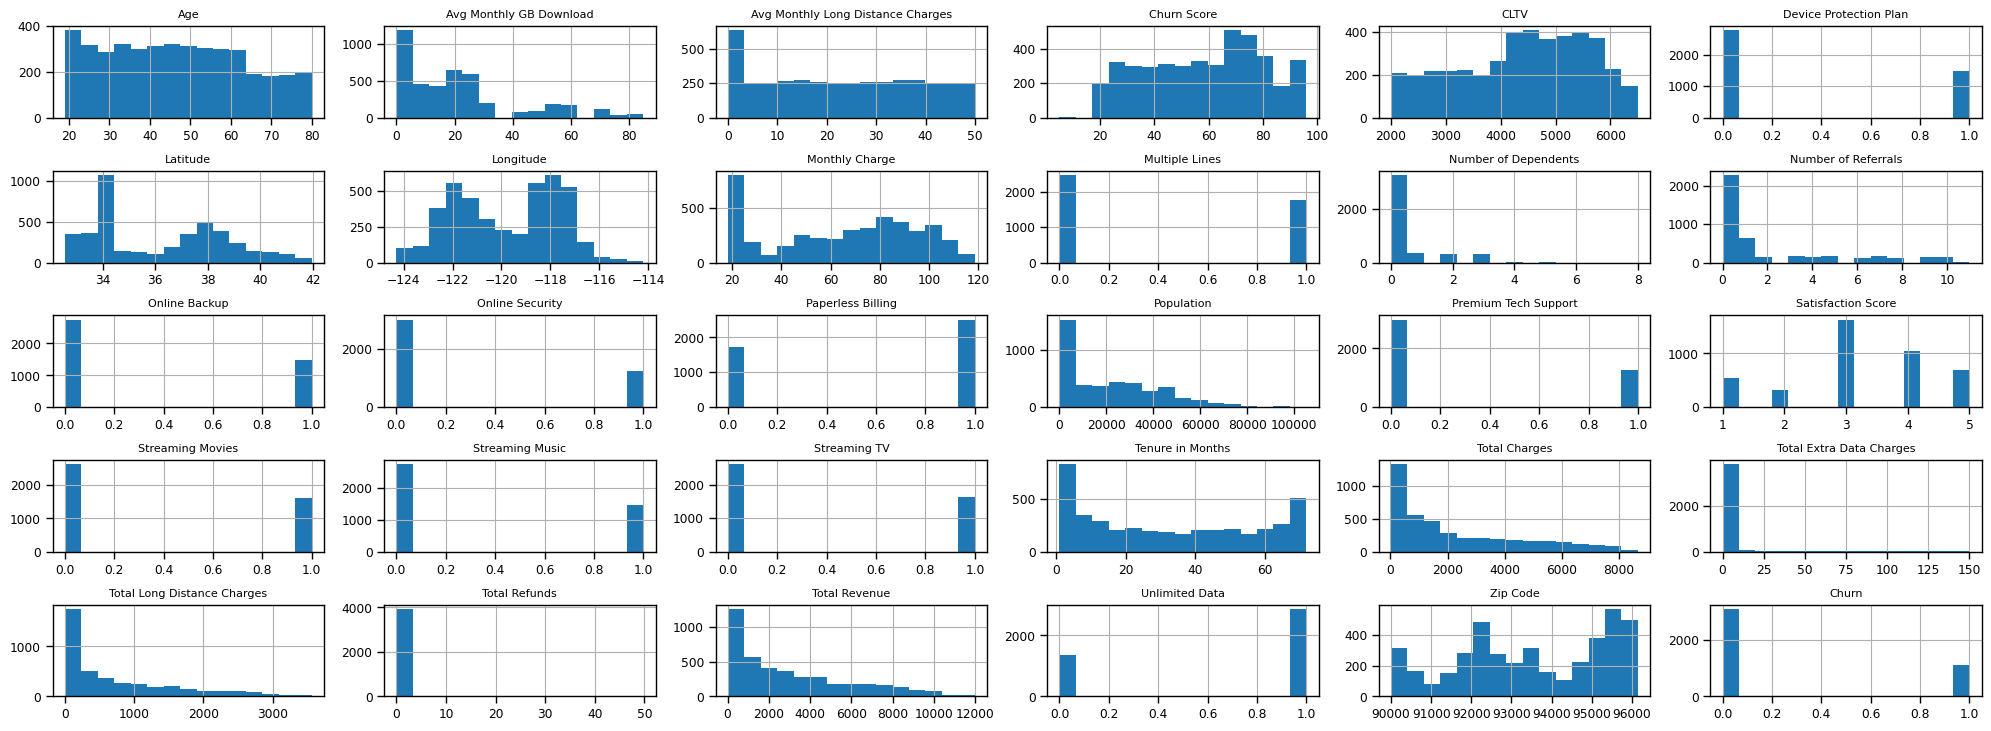

In [85]:
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols].hist(bins=15, figsize=(20,10), layout=(7,6))
plt.tight_layout()
plt.show()

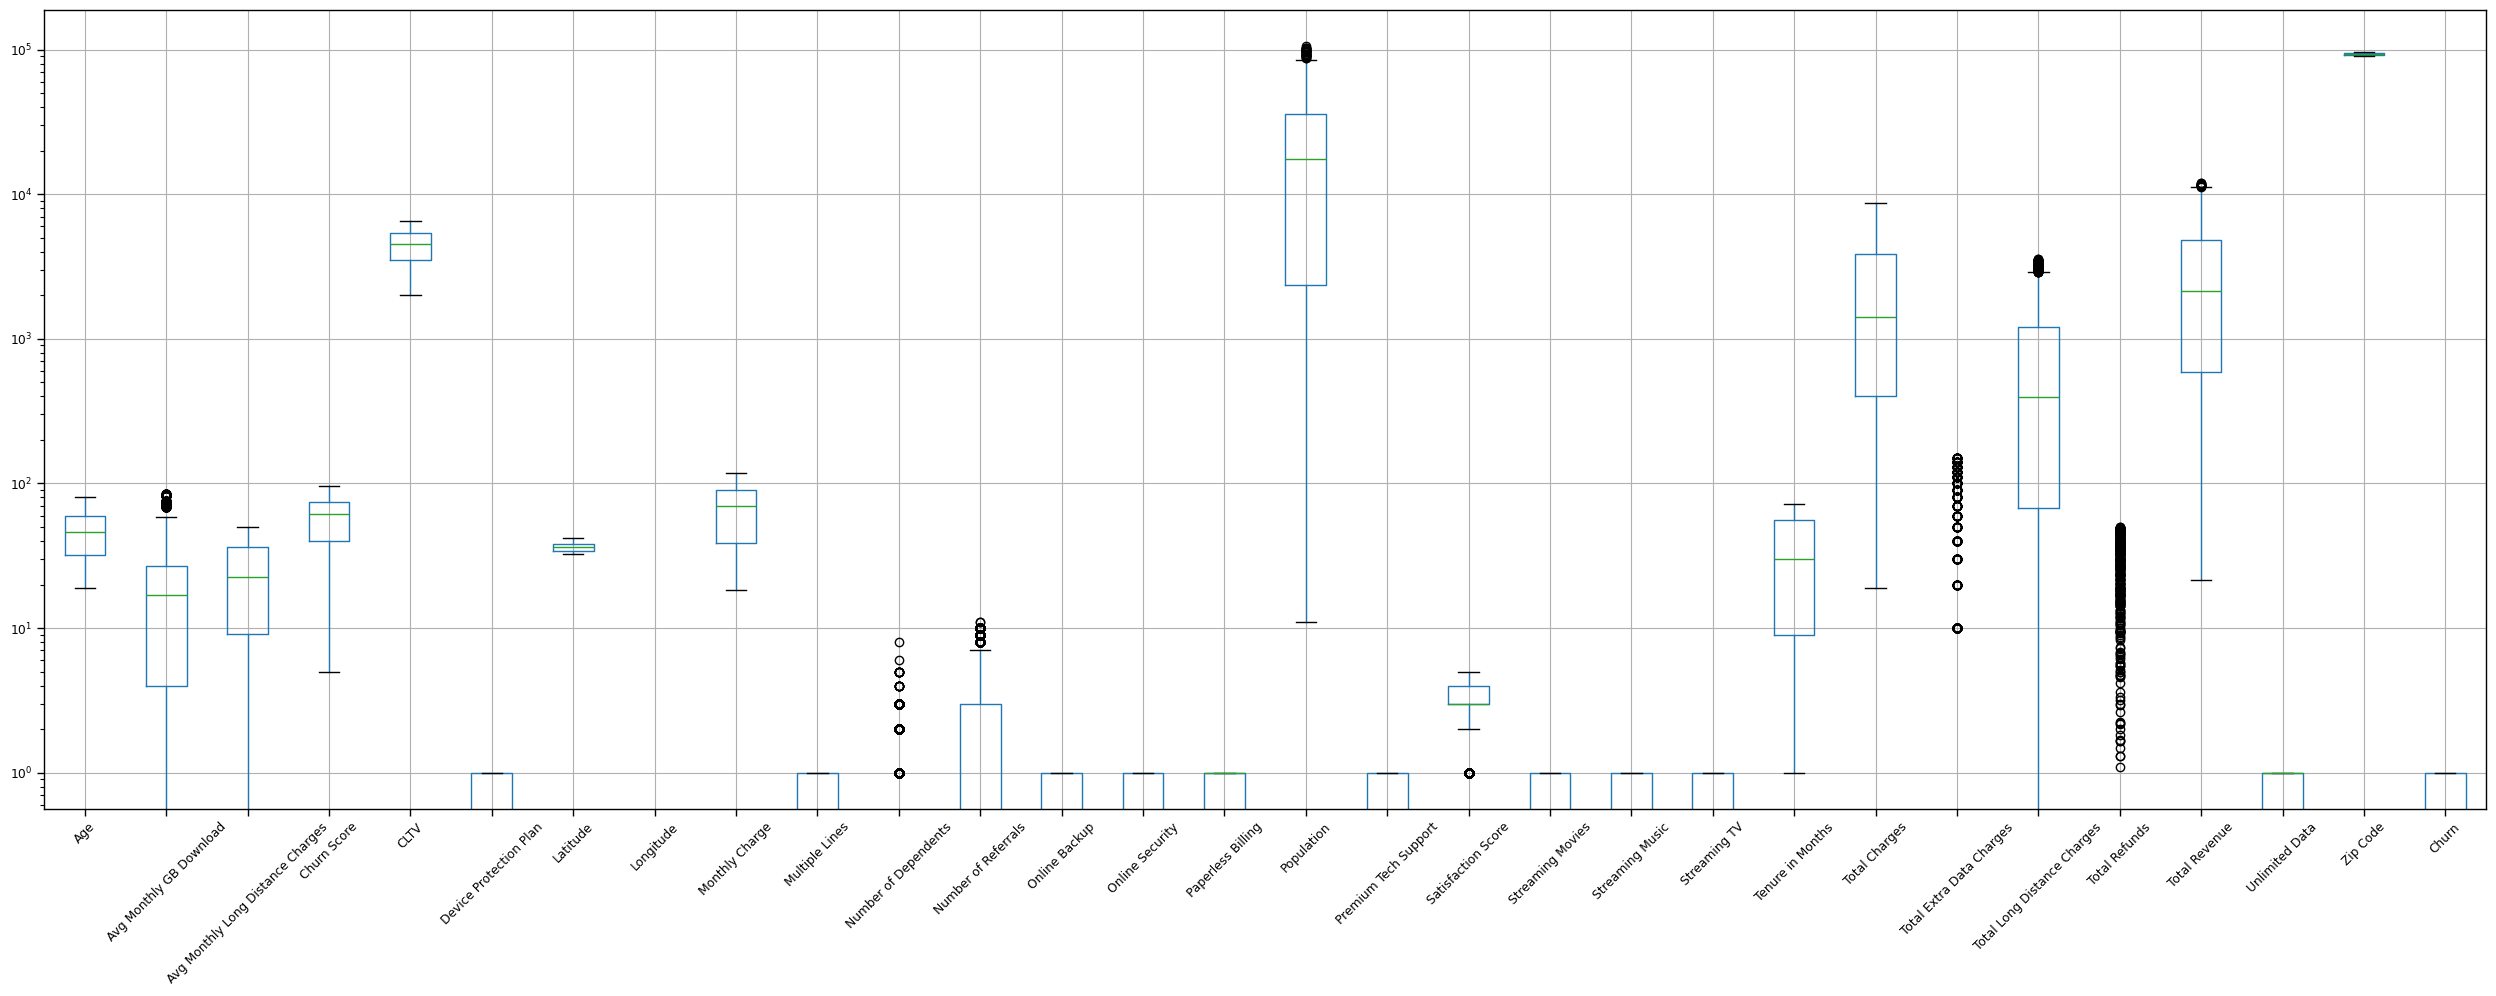

In [86]:
data[numerical_cols].boxplot(figsize=(25,10))
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

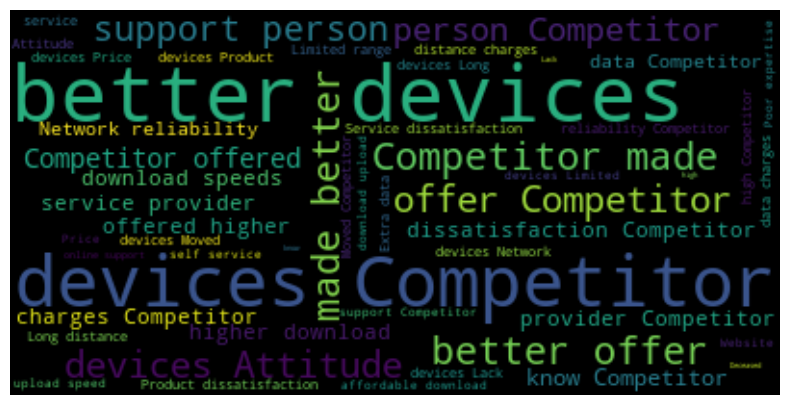

In [87]:
data_wordcloud = data['Churn Reason'].fillna(data['Churn Reason'].mode().values[0])

# Create a WordCloud object
wordcloud = WordCloud().generate(' '.join(data_wordcloud.astype(str)))

# Display the word cloud
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: >

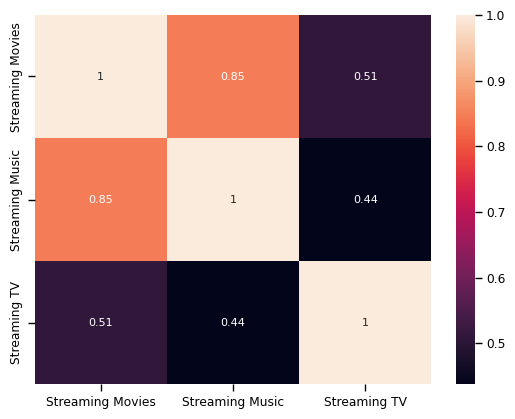

In [88]:
sns.heatmap(data_num[['Streaming Movies', 'Streaming Music', 'Streaming TV']].corr(), annot=True)

In [89]:
def pca_for_streaming(data):
    pca_stream = PCA(n_components=1)
    data_stream = data[['Streaming Movies', 'Streaming Music', 'Streaming TV']]
    pca_stream.fit(data_stream)
    data['Streaming Mo/Mu/TV'] = pca_stream.transform(data_stream)
    return data

data = pca_for_streaming(data).drop(['Streaming Movies', 'Streaming Music', 'Streaming TV'], axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15996\54232106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Streaming Mo/Mu/TV'] = pca_stream.transform(data_stream)


In [90]:
def pca_for_streaming(data_test_test):
    pca_stream = PCA(n_components=1)
    data_test_stream = data_test[['Streaming Movies', 'Streaming Music', 'Streaming TV']]
    pca_stream.fit(data_test_stream)
    data_test['Streaming Mo/Mu/TV'] = pca_stream.transform(data_test_stream)
    return data_test

data_test = pca_for_streaming(data_test).drop(['Streaming Movies', 'Streaming Music', 'Streaming TV'], axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15996\537490309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Streaming Mo/Mu/TV'] = pca_stream.transform(data_test_stream)


In [91]:
data_for_feature = data.select_dtypes(include=['number'])

In [92]:
X = data_for_feature.drop(['Churn'], axis=1)
y = data_for_feature['Churn']

#### Checking Multicollinearity

In [93]:
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,Age,12.348061
1,Avg Monthly GB Download,3.776884
2,Avg Monthly Long Distance Charges,9.453025
3,Churn Score,12.221608
4,CLTV,18.195975
5,Device Protection Plan,2.311213
6,Latitude,489.680028
7,Longitude,7143.380663
8,Monthly Charge,38.573821
9,Multiple Lines,2.701017


#### understanding how vif works

## Classify Churn

### Feature Selection

#### Select K Best (for Feature Selection)

In [94]:
mms = MinMaxScaler()
data_x_for_feature_selection = mms.fit_transform(X) # (make sure the data must be non-negative )

best_feature = SelectKBest(score_func=chi2, k=6)
model_for_feature = best_feature.fit(data_x_for_feature_selection,y)

In [95]:
data_score = pd.DataFrame(model_for_feature.scores_, index=X.columns, columns=['Chi2'])
data_score.nlargest(10, 'Chi2')

,Chi2
Satisfaction Score,383.759088
Churn Score,170.539562
Number of Referrals,149.105661
Tenure in Months,145.935337
Online Security,97.087333
Premium Tech Support,85.433234
Paperless Billing,67.065066
Total Long Distance Charges,60.897823
Total Revenue,52.549634
Number of Dependents,51.340834


#### Extra Trees (for Feature Selection)

In [96]:
model_extratrees = ExtraTreesClassifier()
model_extratrees.fit(X,y)
ExtraTrees_FeatureImportance = pd.Series(model_extratrees.feature_importances_, index=X.columns)
ExtraTrees_FeatureImportance.nlargest(10)

Satisfaction Score             0.444018
Churn Score                    0.214108
Tenure in Months               0.049878
Number of Referrals            0.033395
Online Security                0.024274
Monthly Charge                 0.023269
Paperless Billing              0.017592
Total Charges                  0.017116
Total Revenue                  0.016312
Total Long Distance Charges    0.013252
dtype: float64

In [97]:
combined_scores = pd.concat([data_score['Chi2'], ExtraTrees_FeatureImportance], axis=1, keys=['Chi2 Score', 'ExtraTrees Score'])
combined_scores['AvgScore'] = combined_scores.mean(axis=1)
top_features_byChiExtraTrees = combined_scores.nlargest(10, 'AvgScore').index
X_top_features = X[top_features_byChiExtraTrees]
X_top_features.columns

Index(['Satisfaction Score', 'Churn Score', 'Number of Referrals',
       'Tenure in Months', 'Online Security', 'Premium Tech Support',
       'Paperless Billing', 'Total Long Distance Charges', 'Total Revenue',
       'Number of Dependents'],
      dtype='object')

In [98]:
data_for_training = X_top_features
data_for_testing = data_test[['Satisfaction Score', 'Churn Score', 'Number of Referrals',
       'Tenure in Months', 'Online Security', 'Premium Tech Support',
       'Paperless Billing', 'Total Long Distance Charges', 'Total Revenue',
       'Number of Dependents']]

### Feature Scaling & Split

In [99]:
ss = StandardScaler()
data_training = ss.fit_transform(data_for_training)
data_testing = ss.fit_transform(data_for_testing)
X_train = data_training
X_test = data_testing
y_train = y
y_test = data_test['Churn']

### Modelling

In [37]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Ada Boost Classifier' : AdaBoostClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'Support Vector Classifier' : SVC(probability=True),
    'Naive Bayes' : GaussianNB(),
    'XG Boost Classifier' : XGBClassifier()
}

def evaluate_models(models, X_train, y_train, n_splits=3):
    skfolds = StratifiedKFold(n_splits=n_splits)
    model_scores = {}
    model_roc_data = {}
    model_f1_scores = {}

    for model_name, model in models.items():
        print(f"Evaluating {model_name}")
        accuracy_scores = []
        auc_scores = []
        f1_scores = []

        for train_index, test_index in skfolds.split(X_train, y_train):
            clone_clf = clone(model)
            X_train_folds = X_train[train_index]
            y_train_folds = y_train[train_index]
            X_test_folds = X_train[test_index]
            y_test_folds = y_train[test_index]

            clone_clf.fit(X_train_folds, y_train_folds)
            y_pred = clone_clf.predict(X_test_folds)
            accuracy = sum(y_pred == y_test_folds) / len(y_pred)
            accuracy_scores.append(accuracy)

            # Calculate AUC
            y_pred_prob = clone_clf.predict_proba(X_test_folds)[:, 1]
            auc = roc_auc_score(y_test_folds, y_pred_prob)
            auc_scores.append(auc)

            # Calculate F1 score
            f1 = f1_score(y_test_folds, y_pred)
            f1_scores.append(f1)

        avg_accuracy = np.mean(accuracy_scores)
        model_scores[model_name] = avg_accuracy

        avg_auc = np.mean(auc_scores)
        fpr, tpr, _ = roc_curve(y_test_folds, y_pred_prob)
        model_roc_data[model_name] = (fpr, tpr)

        avg_f1 = np.mean(f1_scores)  
        model_f1_scores[model_name] = avg_f1

        print(f"Average accuracy for {model_name}: {avg_accuracy:.4f}\n")
        print(f"Average AUC for {model_name}: {avg_auc:.4f}\n")
        print(f"Average F1 score for {model_name}: {avg_f1:.4f}\n")
    
    return model_scores, model_roc_data, model_f1_scores

In [38]:
model_scores, model_roc_data, model_f1_scores = evaluate_models(models, X_train, y_train)

Evaluating Logistic Regression
Average accuracy for Logistic Regression: 0.9735

Average AUC for Logistic Regression: 0.9979

Average F1 score for Logistic Regression: 0.9500

Evaluating Decision Tree Classifier
Average accuracy for Decision Tree Classifier: 0.9742

Average AUC for Decision Tree Classifier: 0.9645

Average F1 score for Decision Tree Classifier: 0.9510

Evaluating Random Forest Classifier
Average accuracy for Random Forest Classifier: 0.9787

Average AUC for Random Forest Classifier: 0.9975

Average F1 score for Random Forest Classifier: 0.9591

Evaluating Ada Boost Classifier
Average accuracy for Ada Boost Classifier: 0.9796

Average AUC for Ada Boost Classifier: 0.9983

Average F1 score for Ada Boost Classifier: 0.9615

Evaluating Gradient Boosting Classifier
Average accuracy for Gradient Boosting Classifier: 0.9804

Average AUC for Gradient Boosting Classifier: 0.9986

Average F1 score for Gradient Boosting Classifier: 0.9624

Evaluating Support Vector Classifier
Ave

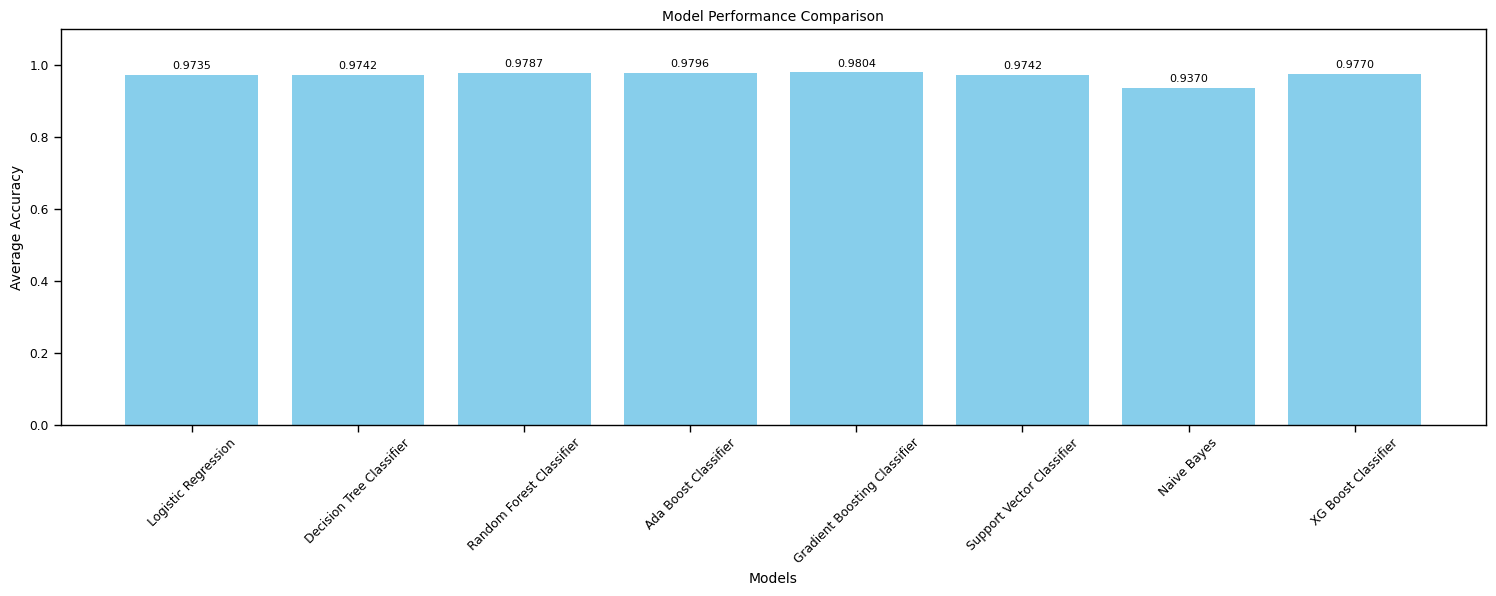

In [39]:
def plot_model_clf_performance(model_scores):
    plt.figure(figsize=(15,6))
    plt.bar(model_scores.keys(), model_scores.values(), color='skyblue')
    plt.xlabel('Models', fontsize=10)
    plt.ylabel('Average Accuracy', fontsize=10)
    plt.title('Model Performance Comparison', fontsize=10)
    plt.xticks(rotation=45)
    plt.ylim(0,1.1)
    for i, v in enumerate(model_scores.values()):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
plot_model_clf_performance(model_scores)

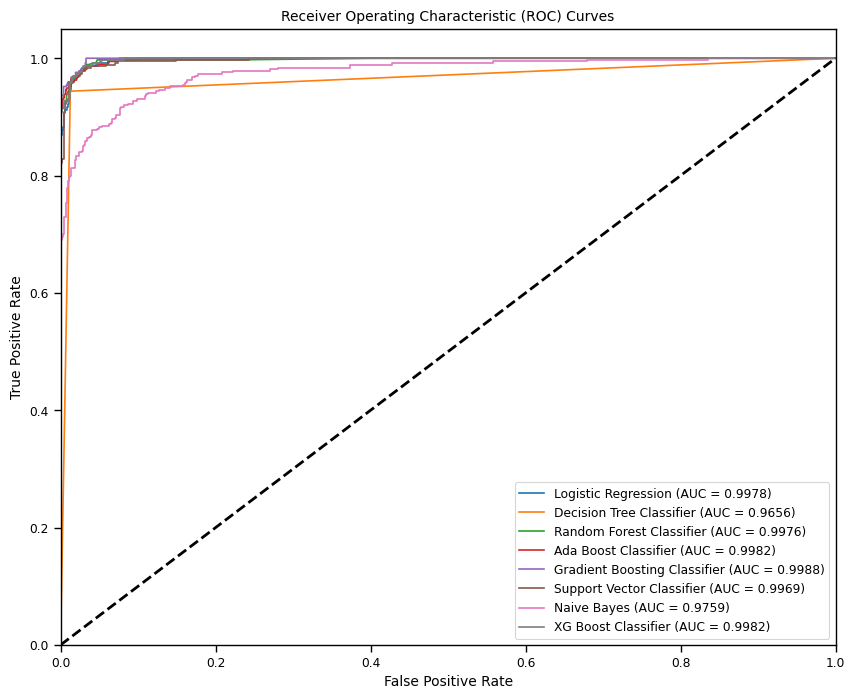

In [40]:
def plot_roc_curves(model_roc_data):
    plt.figure(figsize=(10, 8))
    for model_name, (fpr, tpr) in model_roc_data.items():
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {np.trapz(tpr, fpr):.4f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=10)
    plt.legend(loc="lower right")
    plt.show()

if model_roc_data:
    plot_roc_curves(model_roc_data)

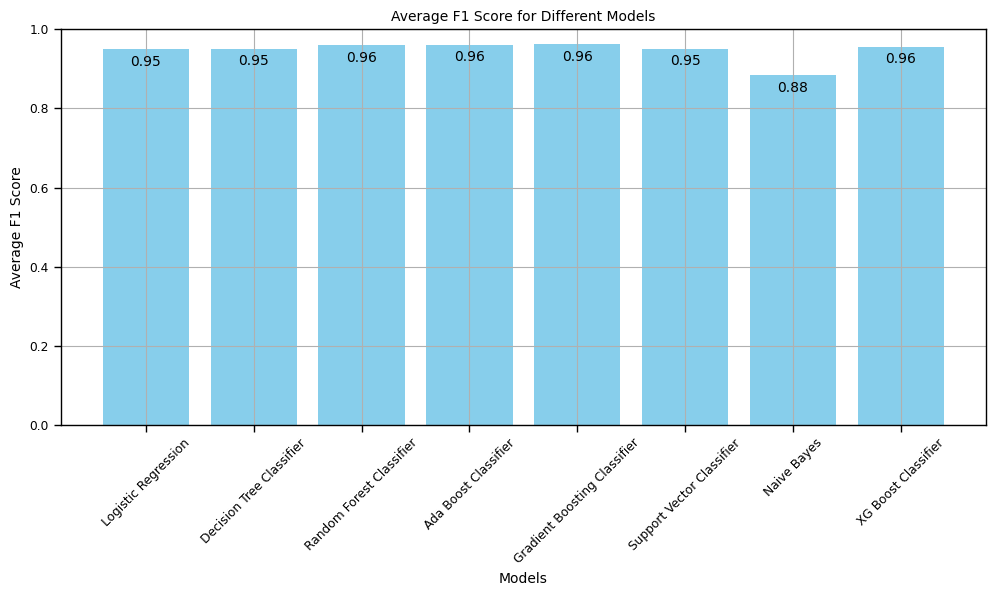

In [41]:
model_names = list(model_f1_scores.keys())
model_f1_values = list(model_f1_scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_f1_values, color='skyblue')

plt.xlabel('Models', fontsize=10)
plt.ylabel('Average F1 Score', fontsize=10)
plt.title('Average F1 Score for Different Models', fontsize=10)
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.grid(True)

# Adding percentage annotations on top of each bar
for bar, f1_value in zip(bars, model_f1_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{f1_value:.2f}', 
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

### Model Selection

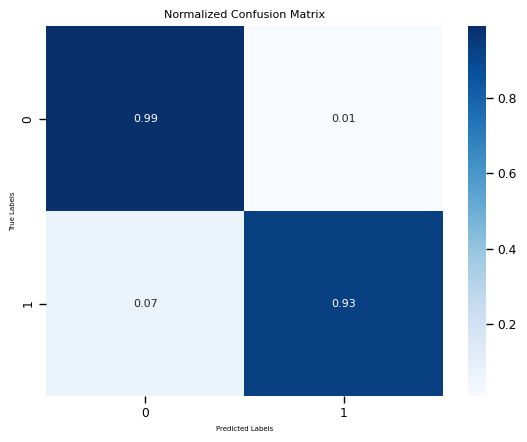

In [42]:
best_model = GradientBoostingClassifier()
best_model.fit(X_train, y_train)

y_pred_test = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
cm_normalized = cm.astype('float') / cm.sum(axis=1).reshape(-1,1)  
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Model Hyperparameter Tuning

In [43]:
# Define the parameter space
param_space = {
    'n_estimators': hp.quniform('n_estimators', 5, 500, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.5)),
    'max_depth': hp.quniform('max_depth', 3, 30, 1),
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 0.5),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.5),
    'subsample': hp.uniform('subsample', 0.2, 1.0),
    'loss': hp.choice('loss', ['exponential', 'log_loss']),
}

def hyper(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    
    model_hyper = GradientBoostingClassifier(**params)

    skf = StratifiedKFold(n_splits=5,
                          shuffle=True,
                          random_state=42)
    
    hyper_scores = cross_val_score(model_hyper, X_train, y_train, cv=skf, error_score='raise')
    return {'loss': -hyper_scores.mean(), 'status': STATUS_OK}

trials = Trials()
best_hyperparams = fmin(fn=hyper,
                        space=param_space,
                        max_evals=50,
                        algo=tpe.suggest,
                        trials=trials,)

best_hyperparams['n_estimators'] = int(best_hyperparams['n_estimators'])
best_hyperparams['max_depth'] = int(best_hyperparams['max_depth'])
print("Best parameters found by Hyperopt:", best_hyperparams)

100%|██████████| 50/50 [12:05<00:00, 14.51s/trial, best loss: -0.978698224852071] 
Best parameters found by Hyperopt: {'learning_rate': 0.02275303500937628, 'loss': 1, 'max_depth': 16, 'min_samples_leaf': 0.015004349160956425, 'min_samples_split': 0.2490001962054954, 'n_estimators': 337, 'subsample': 0.9985909528033738}


In [44]:
pd.DataFrame([best_hyperparams]).T.rename(columns={0:'Best Params'})

,Best Params
learning_rate,0.022753
loss,1.000000
max_depth,16.000000
min_samples_leaf,0.015004
min_samples_split,0.249000
n_estimators,337.000000
subsample,0.998591


### Final Model

Best parameters found by Hyperopt: {'learning_rate': 0.02275303500937628, 'loss': 'log_loss', 'max_depth': 16, 'min_samples_leaf': 0.015004349160956425, 'min_samples_split': 0.2490001962054954, 'n_estimators': 337, 'subsample': 0.9985909528033738}


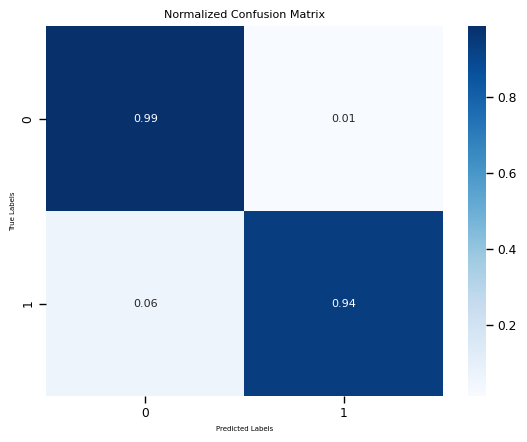

In [45]:
# Convert hyperopt parameters to the proper types
best_hyperparams['max_depth'] = int(best_hyperparams['max_depth'])
best_hyperparams['n_estimators'] = int(best_hyperparams['n_estimators'])

loss_options = ['exponential', 'log_loss']
best_hyperparams['loss'] = loss_options[int(best_hyperparams['loss'])]

print("Best parameters found by Hyperopt:", best_hyperparams)

# Train the best XGBoost model with the optimized hyperparameters
best_model_final = GradientBoostingClassifier(**best_hyperparams)   

best_model_final.fit(X_train, y_train)
y_pred_final = best_model_final.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)
cm_normalized = cm.astype('float') / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [100]:
random_indices = np.random.choice(len(X_test), size=10, replace=False)
random_samples = X_test[random_indices]
random_labels = y_test[random_indices]

random_predictions = best_model.predict(random_samples)

prediction_comparison = pd.DataFrame({
    'Actual Target' : random_labels,
    'Predicted Target' : random_predictions
})

def target_comparison(row):
    if row['Actual Target'] == row['Predicted Target'] == 1:
        return 'TP'
    elif row['Actual Target'] == row['Predicted Target'] == 0:
        return 'TN'
    elif row['Actual Target'] == 1 and row['Predicted Target'] == 0:
        return 'FN'
    elif row['Actual Target'] == 0 and row['Predicted Target'] == 1:
        return 'FP'
    
prediction_comparison['Comparison'] = prediction_comparison.apply(target_comparison, axis=1)
prediction_comparison

,Actual Target,Predicted Target,Comparison
116,1,1,TP
349,1,1,TP
1286,1,1,TP
634,0,0,TN
642,0,0,TN
214,0,0,TN
786,0,0,TN
1358,0,0,TN
564,0,0,TN
1019,1,1,TP
